<a href="https://colab.research.google.com/github/premtech1402/Agribiomass/blob/main/Minorproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Load your dataset
file_path = '/content/agribiomass.csv'
data = pd.read_csv(file_path)

# Encode categorical data
from sklearn.preprocessing import LabelEncoder

crop_encoder = LabelEncoder()
waste_encoder = LabelEncoder()

# Encode Crop Type & Waste Type
data['Crop Type Encoded'] = crop_encoder.fit_transform(data['Crop Type'])
data['Waste Type Encoded'] = waste_encoder.fit_transform(data['Waste Type'])

# Save encoders for later use
joblib.dump({'Crop Type': crop_encoder, 'Waste Type': waste_encoder}, 'label_encoders.pkl')

# Feature and target selection
X = data[['Crop Type Encoded', 'Waste Type Encoded', 'Waste Amount (kg)']].values
y = data['Biomass Yield (kg)'].values

# Save processing method for reference
processing_methods = data.set_index(['Crop Type', 'Waste Type'])['Processing Method'].to_dict()
joblib.dump(processing_methods, 'processing_methods.pkl')


['processing_methods.pkl']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'agribiomass_model.pkl')


['agribiomass_model.pkl']

In [ ]:
# Load the model, encoders, and methods
model = joblib.load('agribiomass_model.pkl')
encoders = joblib.load('label_encoders.pkl')
processing_methods = joblib.load('processing_methods.pkl')

# Prediction function with processing method
def predict_biomass(crop, waste, amount):
    try:
        # Encode inputs
        crop_encoded = encoders['Crop Type'].transform([crop])[0]
        waste_encoded = encoders['Waste Type'].transform([waste])[0]

        # Prediction
        input_data = np.array([[crop_encoded, waste_encoded, amount]])
        predicted_biomass = model.predict(input_data)[0]

        # Find the recommended processing method
        method = processing_methods.get((crop, waste), "Method Not Available")

        return f"Predicted Biomass Amount: {predicted_biomass:.2f} kg\nRecommended Processing Method: {method}"

    except ValueError:
        return "Error: Invalid Crop Type or Waste Type provided."
    except Exception as e:
        return f"Unexpected Error: {e}"


In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 15.18
Mean Squared Error (MSE): 462.92
R² Score: 0.95


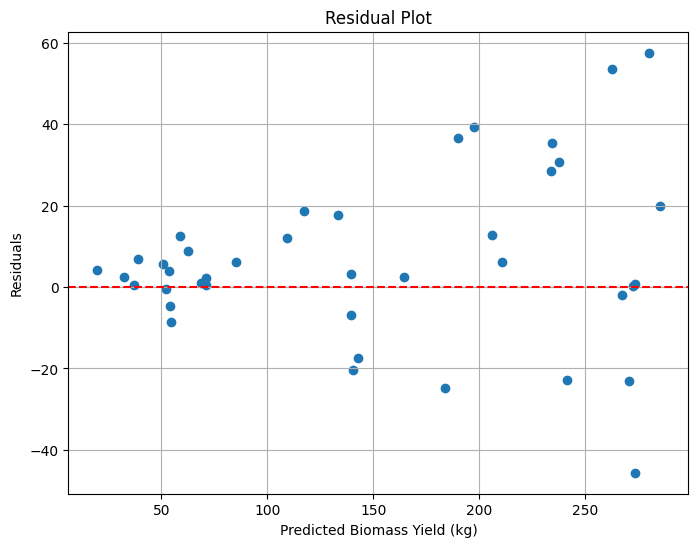

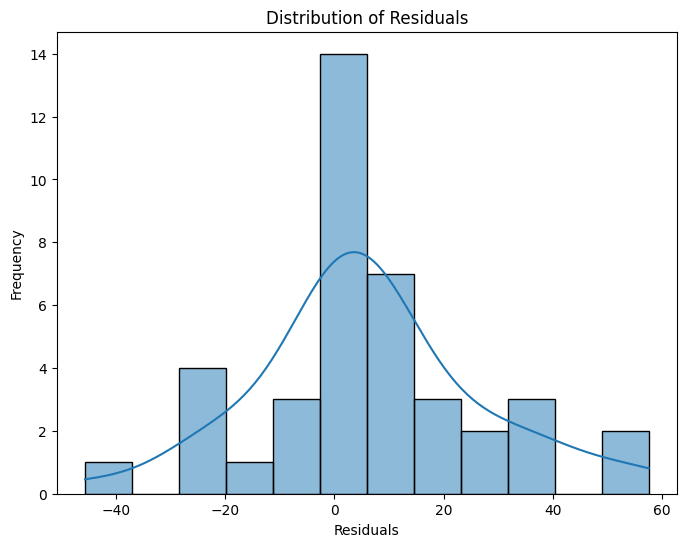

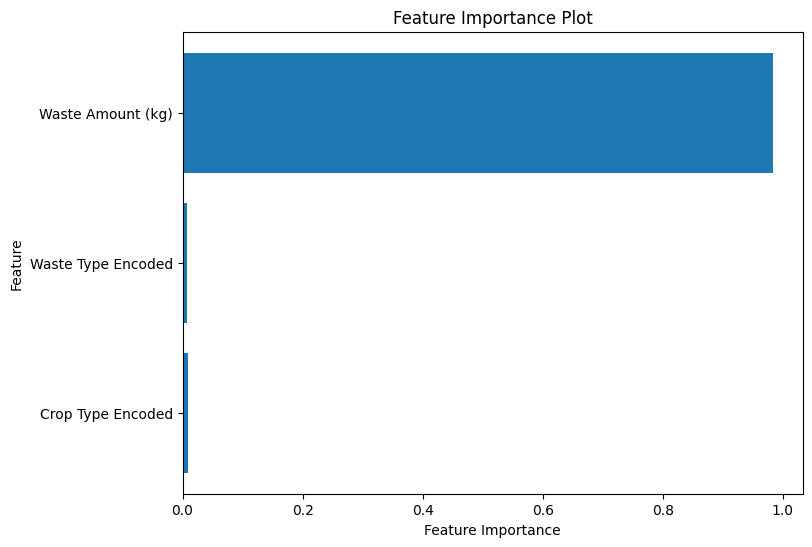

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# 1. Residual Plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Biomass Yield (kg)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

# 2. Distribution Plot of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


# 3. Feature Importance Plot
feature_importances = model.feature_importances_
feature_names = ['Crop Type Encoded', 'Waste Type Encoded', 'Waste Amount (kg)']  # Replace with your actual feature names

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()


In [ ]:
method_product_info = data.groupby(['Crop Type', 'Waste Type'])[['Processing Method', 'Resulting Product']].first().to_dict('index')

# Saving this updated mapping
joblib.dump(method_product_info, 'method_product_info.pkl')

['method_product_info.pkl']

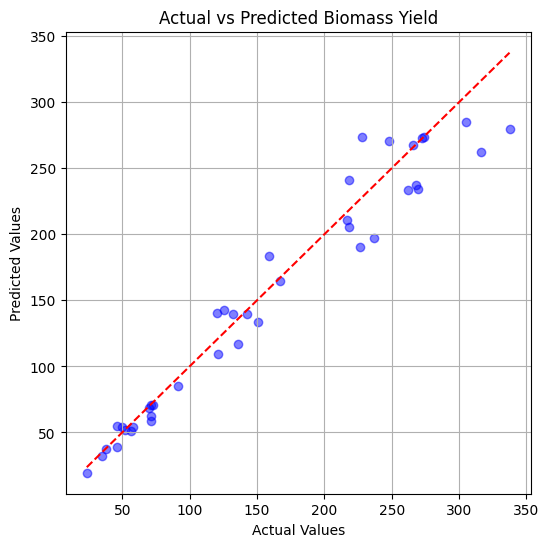

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title('Actual vs Predicted Biomass Yield')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
input_data = np.array([[0, 1, 100]])
print("Prediction:", model.predict(input_data))

Prediction: [32.022]


In [ ]:
predict_biomass("Rice", "Husk", 120)

'Predicted Biomass Amount: 37.69 kg\nRecommended Processing Method: Gasification'

In [ ]:
import gradio as gr

def predict_biomass(crop, waste, amount):
    try:
        # Encode inputs
        crop_encoded = encoders['Crop Type'].transform([crop])[0]
        waste_encoded = encoders['Waste Type'].transform([waste])[0]

        # Predict biomass yield
        input_data = np.array([[crop_encoded, waste_encoded, amount]])
        predicted_biomass = model.predict(input_data)[0]

        # Lookup method and product
        method_info = method_product_info.get((crop, waste))

        if (
            method_info is None or
            method_info.get('Processing Method', 'Not Available') == "Not Available" or
            method_info.get('Resulting Product', 'Not Available') == "Not Available"
        ):
            return "❌ Error: No processing method or resulting product available for this crop and waste combination."

        method = method_info['Processing Method']
        product = method_info['Resulting Product']

        return (
            f"🌾 Predicted Biomass Amount: {predicted_biomass:.2f} kg\n"
            f"🔧 Recommended Processing Method: {method}\n"
            f"📦 Resulting Product: {product}"
        )

    except ValueError:
        return "❌ Error: Invalid Crop Type or Waste Type provided."
    except Exception as e:
        return f"❌ Unexpected Error: {e}"

# Gradio Interface
interface = gr.Interface(
    fn=predict_biomass,
    inputs=[
        gr.Textbox(label="Crop Type", placeholder="e.g., Wheat"),
        gr.Textbox(label="Waste Type", placeholder="e.g., Straw"),
        gr.Number(label="Waste Amount (kg)")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="🌾 Agribiomass Yield Predictor",
    description="Enter crop type, waste type, and waste amount to predict biomass yield with processing method and resulting product."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28f6d2b410f68f8041.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
